In [ ]:
%autosave 60

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.api.types import is_numeric_dtype
from sklearn import preprocessing
from scipy import stats
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [2]:
#Importing data into dataframe
df =  pd.read_csv('C://Data/all.csv')

In [3]:
df.drop(['ph_PostMigratedHere','ph_UnknownSuggestionEvent','ph_QuestionMerged','ph_PostMigrated','ph_PostMigrated','p_Wiki','ph_QuestionUnmerged','ph_PostDisassociated','ph_SuggestedEditApplied','ph_UnknownDevRelatedEvent','ph_VoteNullificationByDev','ph_PostTweeted','ph_PostUnmigrated','ph_UnknownModeratorEvent','ph_UnknownEvent','ph_CommentDiscussionMovedToChat','p_PrivilegeWiki','p_WikiPlaceholder'], axis= 1, inplace=True);

In [4]:
df.head()

,Id,country,AboutMe_length,activity_in_months,UpVotes,DownVotes,Reputation,Views,badges,Q_comments,...,ph_CommunityOwned,ph_PostLocked,ph_PostUnlocked,ph_QuestionUnprotected,ph_QuestionProtected,ph_PostNoticeRemoved,ph_PostNoticeAdded,ph_PostMergeSource,ph_PostMigratedAway,ph_PostMergeDestination
0,7784035,usa,1407.0,0.0,0,0,1,2,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9126518,usa,622.0,0.0,0,0,1,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10021482,usa,370.0,0.0,0,0,1,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2739419,usa,400.0,0.0,0,0,1,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1440631,usa,32.0,0.0,0,0,1,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


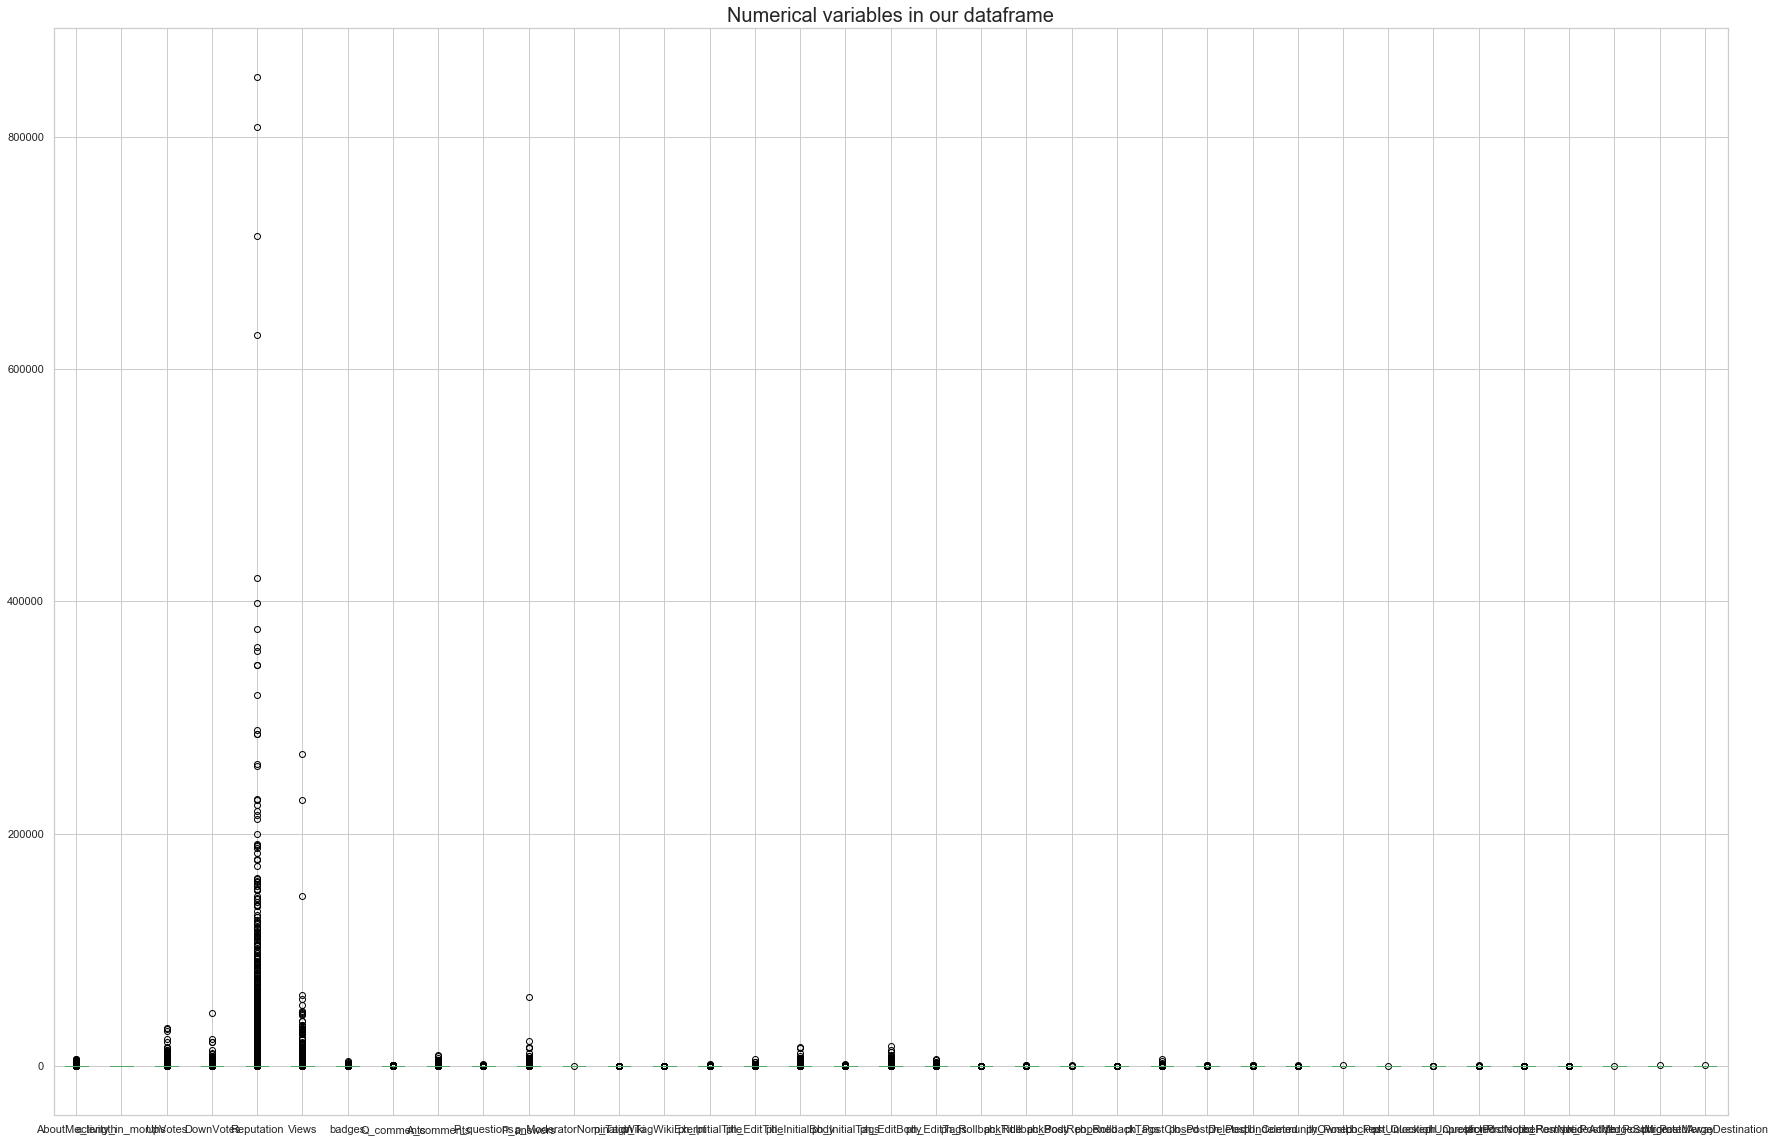

In [5]:
num_cols = ['AboutMe_length','activity_in_months','UpVotes','DownVotes','Reputation','Views','badges','Q_comments','A_comments','P_questions','P_answers','p_ModeratorNomination','p_TagWiki','p_TagWikiExerpt','ph_InitialTitle','ph_EditTitle','ph_InitialBody','ph_InitialTags','ph_EditBody','ph_EditTags','ph_RollbackTitle','ph_RollbackBody','ph_PostReopened','ph_RollbackTags','ph_PostClosed','ph_PostDeleted','ph_PostUndeleted','ph_CommunityOwned','ph_PostLocked','ph_PostUnlocked','ph_QuestionUnprotected','ph_QuestionProtected','ph_PostNoticeRemoved','ph_PostNoticeAdded','ph_PostMergeSource','ph_PostMigratedAway','ph_PostMergeDestination']
plt.figure(figsize=(30,20))
df[num_cols].boxplot()
plt.title("Numerical variables in our dataframe", fontsize=20)
plt.show()

In [6]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [7]:
df.head()

,Id,country,AboutMe_length,activity_in_months,UpVotes,DownVotes,Reputation,Views,badges,Q_comments,...,ph_CommunityOwned,ph_PostLocked,ph_PostUnlocked,ph_QuestionUnprotected,ph_QuestionProtected,ph_PostNoticeRemoved,ph_PostNoticeAdded,ph_PostMergeSource,ph_PostMigratedAway,ph_PostMergeDestination
4,1440631,usa,32.0,0.0,0,0,1,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4036517,usa,30.0,0.0,0,0,1,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8425017,usa,124.0,0.0,0,0,1,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2572342,usa,215.0,0.0,0,0,1,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,5076320,usa,223.0,0.0,0,0,1,2,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


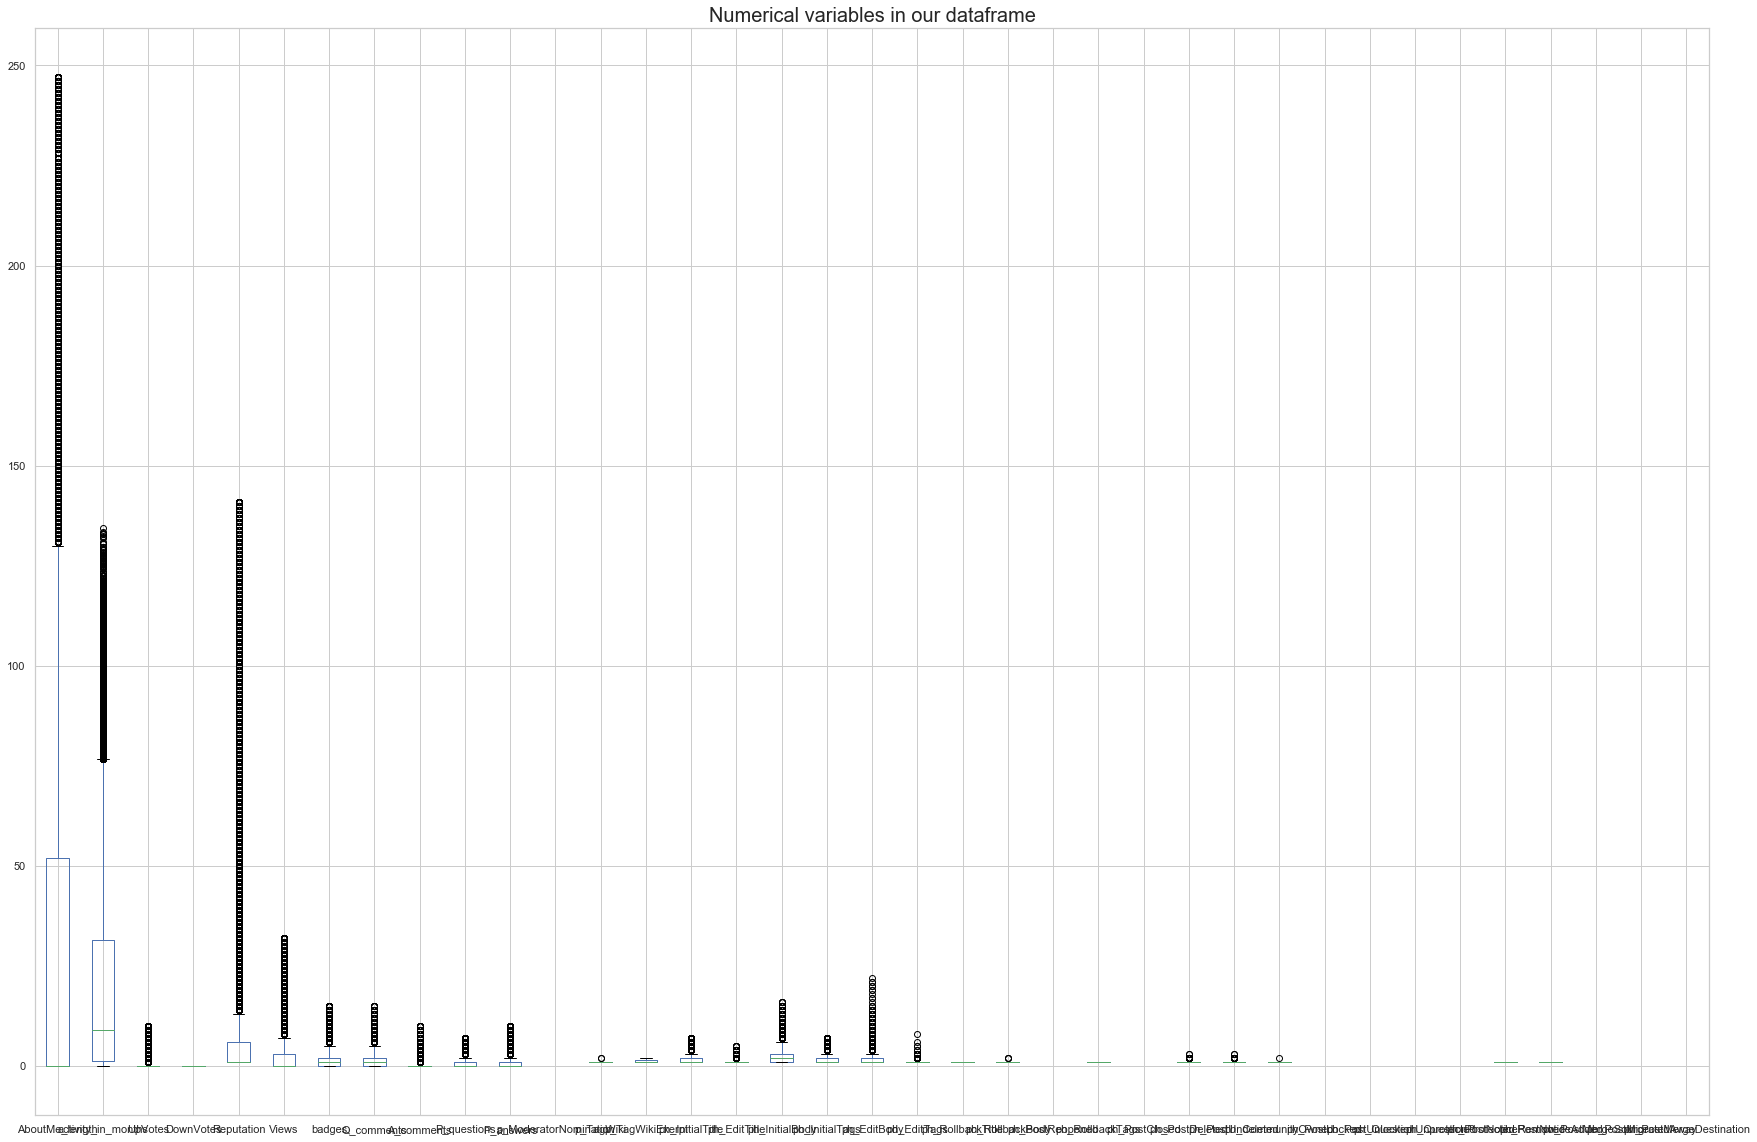

In [9]:
num_cols = ['AboutMe_length','activity_in_months','UpVotes','DownVotes','Reputation','Views','badges','Q_comments','A_comments','P_questions','P_answers','p_ModeratorNomination','p_TagWiki','p_TagWikiExerpt','ph_InitialTitle','ph_EditTitle','ph_InitialBody','ph_InitialTags','ph_EditBody','ph_EditTags','ph_RollbackTitle','ph_RollbackBody','ph_PostReopened','ph_RollbackTags','ph_PostClosed','ph_PostDeleted','ph_PostUndeleted','ph_CommunityOwned','ph_PostLocked','ph_PostUnlocked','ph_QuestionUnprotected','ph_QuestionProtected','ph_PostNoticeRemoved','ph_PostNoticeAdded','ph_PostMergeSource','ph_PostMigratedAway','ph_PostMergeDestination']
plt.figure(figsize=(30,20))
df[num_cols].boxplot()
plt.title("Numerical variables in our dataframe", fontsize=20)
plt.show()

In [ ]:
# def remove_outlier(df):
#     low = 0.25
#     high = 0.75
#     quant_df = df.quantile([low, high])
#     for name in list(df.columns):
#         if is_numeric_dtype(df[name]):
#             df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
#     return df
# remove_outlier(df)